# Principal Component Analysis

# Introduction
"Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. The number of principal components is less than or equal to the number of original variables. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. The resulting vectors are an uncorrelated orthogonal basis set. PCA is sensitive to the relative scaling of the original variables."[see Wikipedia](https://en.wikipedia.org/wiki/Principal_component_analysis)

This exercise will give step by step introductions to implement a PCA and also show a shortcut using scikit-learn. The exercise is based on work by [Sebastian Raschka](http://sebastianraschka.com). You find links to his articles in the further information section.


# Preparation
## required librarys
* [numpy](http://www.numpy.org/)
* [matplotlib](http://matplotlib.org/)
* [scikit-learn](http://scikit-learn.org/stable/)

Those packages can be installed via pip on linux. Please follow the documentation on the websites for different operating systems. On linux it is also possible to install Anaconda, which bundles all those packages and a lot more.  


In [45]:
from sklearn import datasets
iris = datasets.load_iris()
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [46]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [47]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [48]:
class0_sample = iris.data[iris.target==0]
class1_sample = iris.data[iris.target==1]
class2_sample = iris.data[iris.target==2]

In [49]:
class_names = iris.target_names
class_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Plot the resulting data to get a first impression of the 3-dimensional distribution.

Populating the interactive namespace from numpy and matplotlib


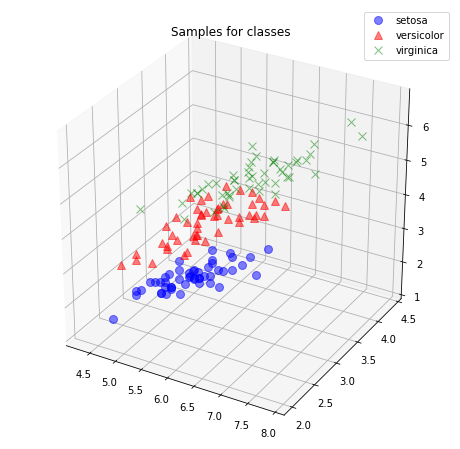

In [50]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

# create a new figure
fig = plt.figure(figsize=(8,8))
# add new axis for 3D output
ax = fig.add_subplot(111, projection='3d')
# set the plot title
plt.title('Samples for classes')



# plot the data, python notation class1_sample[0, :] means 
# "take elements from row 0 of class1_sample and first to last column
ax.plot(class0_sample[:,0], class0_sample[:,1], class0_sample[:,2], 'o', markersize=8, \
        color='blue', alpha=0.5, label=class_names[0])
ax.plot(class1_sample[:,0], class1_sample[:,1], class1_sample[:,2], '^', markersize=8, \
        color='red', alpha=0.5, label=class_names[1])
ax.plot(class2_sample[:,0], class2_sample[:,1], class2_sample[:,2], 'x', markersize=8, \
        alpha=0.5, color='green', label=class_names[2])

# show legend at upper right corner
ax.legend(loc='upper right')
# set legend font size
plt.rcParams['legend.fontsize'] = 10   

plt.show()

# Step by Step
Principal Component Analysis consists of 6 general steps:
1. Preprocessing
2. Compute d-dimensional mean vector
3. Compute covariance matrix
4. Calculate eigenvectors and corresponding eigenvalues
5. Choose best eigenvectors
6. Project samples onto new subspace



## 1. Preprocessing
This might be handling missing values or removing outliers

In [51]:
all_samples = iris.data
print(all_samples)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

## 2. Compute d-dimensional mean vector
The mean value sums up all n elements and divides by n.  
$ {1\over n} ({x_1}+{x_2}+..+{x_n}) $

The python notation "all_samples[:,0]" translates to "elements from all_samples in first column". 

In [52]:
mean_0 = np.mean(all_samples[:,0])
mean_1 = np.mean(all_samples[:,1])
mean_2 = np.mean(all_samples[:,2])
#mean_3 = np.mean(all_samples[:,3])

#mean_vector = np.array([[mean_0],[mean_1],[mean_2],[mean_3]])

mean_vector = np.array([[mean_0],[mean_1],[mean_2]])


print(mean_vector)

[[5.84333333]
 [3.05733333]
 [3.758     ]]


In [53]:
all_samples_shift = all_samples[:,0:3]

In [54]:
all_samples.shape

(150, 4)

In [55]:
all_samples_shift[0,:]-mean_vector.T

array([[-0.74333333,  0.44266667, -2.358     ]])

In [56]:
for i in range(1,all_samples.shape[0]):
    all_samples_shift[i,:]=all_samples_shift[i,:] - mean_vector.T

## 3. Compute covariance matrix



In [57]:
## the longer form uses the mean_vector and the dot-product, we use a shortcut

cov_mat = np.cov([all_samples_shift[:,0],all_samples_shift[:,1],all_samples_shift[:,2]])

print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[ 0.8550212   0.07877371  1.30948876]
 [ 0.07877371  0.27046083 -0.29027912]
 [ 1.30948876 -0.29027912  3.0914838 ]]


## 4. Calculate eigenvectors and corresponding eigenvalues



In [58]:
# eigenvectors and eigenvalues from the covariance matrix

eig_val_sc, eig_vec_sc = np.linalg.eig(cov_mat)
print('eig_val_sc:\n', eig_val_sc, '\n')
print('eig_vec_sc:\n', eig_vec_sc, '\n')

# therefore the eigenvector matrix is seperated into several vectors
for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    
    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_sc[i]))
    print(40 * '-')

eig_val_sc:
 [3.71073804 0.44576441 0.06046338] 

eig_vec_sc:
 [[-0.41434826 -0.66004952  0.62661803]
 [ 0.06709625 -0.7087817  -0.70222973]
 [-0.90764179  0.24892394 -0.33796931]] 

Eigenvector 1: 
[[-0.41434826]
 [ 0.06709625]
 [-0.90764179]]
Eigenvalue 1 from covariance matrix: 3.7107380373916317
----------------------------------------
Eigenvector 2: 
[[-0.66004952]
 [-0.7087817 ]
 [ 0.24892394]]
Eigenvalue 2 from covariance matrix: 0.4457644135932498
----------------------------------------
Eigenvector 3: 
[[ 0.62661803]
 [-0.70222973]
 [-0.33796931]]
Eigenvalue 3 from covariance matrix: 0.0604633777001813
----------------------------------------


In [15]:
eig_vec_sc[0,0]

-0.4143482577809275

Visualizing eigenvectors

## 5. Choose best eigenvectors



In [59]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
# lambda functions are pythons way of using anonymous functions
# "for all tuples x return the first element, the eigenvalue, and sort them descending (reverse = True)" 
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for pair in eig_pairs:
    print(pair)

(3.7107380373916317, array([-0.41434826,  0.06709625, -0.90764179]))
(0.4457644135932498, array([-0.66004952, -0.7087817 ,  0.24892394]))
(0.0604633777001813, array([ 0.62661803, -0.70222973, -0.33796931]))


In [60]:
## reducing from 3 to 2 dimensions, how many dimensions are still needed can be calculated with "cumulative explained variance"
## eig_pairs[0][1] references the eigenvector from the first pair of (eigenvalue, eigenvector) 
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)
print('Transposed Matrix W:\n', matrix_w.T)

Matrix W:
 [[-0.41434826 -0.66004952]
 [ 0.06709625 -0.7087817 ]
 [-0.90764179  0.24892394]]
Transposed Matrix W:
 [[-0.41434826  0.06709625 -0.90764179]
 [-0.66004952 -0.7087817   0.24892394]]


## 6. Project samples onto new subspace

The dot-product of all_samples and the transposed matrix_w reduces the dimensions from 3 to 2. For more information see [numpy documentation](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.dot.html).

In [61]:
transformed = matrix_w.T.dot(all_samples_shift[:,0:3].T).T
print(transformed)

[[-3.14903773 -5.49849499]
 [ 2.52724101  0.07632087]
 [ 2.71429409  0.04168204]
 [ 2.56749093  0.22834995]
 [ 2.52606393 -0.4149531 ]
 [ 2.10816097 -0.81693023]
 [ 2.67838398 -0.00917695]
 [ 2.4218805  -0.24830436]
 [ 2.72770551  0.4772238 ]
 [ 2.44318645  0.0303351 ]
 [ 2.27627008 -0.72495868]
 [ 2.41398598 -0.09140207]
 [ 2.56867583  0.14232583]
 [ 3.0481425   0.3976734 ]
 [ 2.40295218 -1.27629019]
 [ 2.19893297 -1.41912073]
 [ 2.47121768 -0.91649981]
 [ 2.47791948 -0.41007988]
 [ 1.97714687 -0.94406692]
 [ 2.40728418 -0.597822  ]
 [ 2.07461284 -0.46253938]
 [ 2.40057455 -0.52694383]
 [ 3.05485995 -0.25050287]
 [ 2.19220769 -0.19364636]
 [ 2.14169344 -0.01672488]
 [ 2.30427782  0.06010071]
 [ 2.33111632 -0.22341197]
 [ 2.34572048 -0.45119244]
 [ 2.42977503 -0.40520666]
 [ 2.44200155  0.11635923]
 [ 2.3938571   0.12123244]
 [ 2.2561412  -0.51232417]
 [ 2.38597823 -0.87646146]
 [ 2.35914755 -1.17024688]
 [ 2.44318645  0.0303351 ]
 [ 2.68075379 -0.18122521]
 [ 2.40294436 -0.69899208]
 

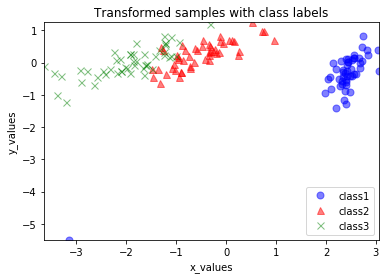

In [62]:
transformed_0 = transformed[iris.target==0]
transformed_1 = transformed[iris.target==1]
transformed_2 = transformed[iris.target==2]

xmin = transformed[:,0].min()
xmax = transformed[:,0].max()
ymin = transformed[:,1].min()
ymax = transformed[:,1].max()



plt.plot(transformed_0[:,0], transformed_0[:,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed_1[:,0], transformed_1[:,1], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.plot(transformed_2[:,0], transformed_2[:,1], 'x', markersize=7, color='green', alpha=0.5, label='class3')

plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

# Shortcut with scikit-learn

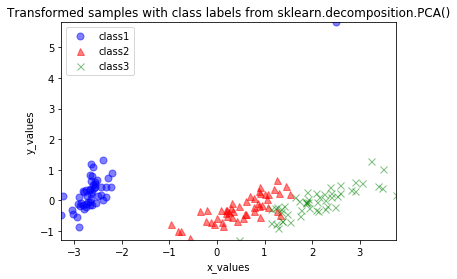

In [63]:
from sklearn.decomposition import PCA as sklearnPCA

# n_components specifies how many dimensions should be kept
sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(all_samples)

sklearn_transf_0 = sklearn_transf[iris.target==0]
sklearn_transf_1 = sklearn_transf[iris.target==1]
sklearn_transf_2 = sklearn_transf[iris.target==2]

xmin = sklearn_transf[:,0].min()
xmax = sklearn_transf[:,0].max()
ymin = sklearn_transf[:,1].min()
ymax = sklearn_transf[:,1].max()



plt.plot(sklearn_transf_0[:,0],sklearn_transf_0[:,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf_1[:,0],sklearn_transf_1[:,1], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.plot(sklearn_transf_2[:,0],sklearn_transf_2[:,1], 'x', markersize=7, color='green', alpha=0.5, label='class3')


plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.legend()
plt.title('Transformed samples with class labels from sklearn.decomposition.PCA()')

plt.show()

In [21]:
sklearn_transf

array([[ 2.51143760e+00,  5.81523638e+00],
       [-2.75176866e+00, -1.19826721e-01],
       [-2.92668295e+00, -1.07021895e-01],
       [-2.78727091e+00, -2.75978963e-01],
       [-2.75439850e+00,  3.51778111e-01],
       [-2.29658372e+00,  7.35992729e-01],
       [-2.85788229e+00, -7.99405479e-02],
       [-2.65552116e+00,  2.01100619e-01],
       [-2.93508632e+00, -5.31619803e-01],
       [-2.70825615e+00, -4.74194703e-02],
       [-2.52377141e+00,  6.78180201e-01],
       [-2.64623022e+00,  4.67732933e-02],
       [-2.82482781e+00, -1.67012561e-01],
       [-3.27090388e+00, -4.62330249e-01],
       [-2.64800536e+00,  1.20462376e+00],
       [-2.38705768e+00,  1.31126813e+00],
       [-2.63789530e+00,  8.01811366e-01],
       [-2.67456463e+00,  3.31852535e-01],
       [-2.21079424e+00,  8.97440805e-01],
       [-2.60956089e+00,  5.16732124e-01],
       [-2.33279146e+00,  4.43936633e-01],
       [-2.56774550e+00,  4.27870215e-01],
       [-3.24778399e+00,  1.41851414e-01],
       [-2.

# Further Information

* [Sebastian Raschka - Implementing a PCA](http://sebastianraschka.com/Articles/2014_pca_step_by_step.html)
* [Sebastian Raschka - Principal Component Analysis in 3 simple steps](http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html)
* [sklearn - PCA documentation](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
* [sklearn - PCA user guide](http://scikit-learn.org/stable/modules/decomposition.html#pca)

In [22]:
X=[12, 23, 34 ,44 ,59, 70 ,98]
Y=[12 ,15 ,25 ,27 ,32, 88 ,99]
Z=[15, 35 ,78, 82 ,90, 95 ,97]


In [26]:
print('Mean of X is',np.mean(X))
print('Mean of Y is',np.mean(Y))
print('Mean of Z is',np.mean(Z))

Mean of X is 48.57142857142857
Mean of Y is 42.57142857142857
Mean of Z is 70.28571428571429


In [27]:
print('Standard deviation of X is',np.std(X))
print('Standard deviation of Y is',np.std(Y))
print('Standard deviation of Z is',np.std(Z))

Standard deviation of X is 27.348842455823785
Standard deviation of Y is 32.96256379963334
Standard deviation of Z is 29.788369186236267


In [28]:
print('Variance of X is',np.var(X))
print('Variance of Y is',np.var(Y))
print('Variance of Z is',np.var(Z))

Variance of X is 747.9591836734695
Variance of Y is 1086.530612244898
Variance of Z is 887.3469387755102


In [29]:
print('Covariance of X and Y is', np.cov(X,Y))

Covariance of X and Y is [[ 872.61904762  967.11904762]
 [ 967.11904762 1267.61904762]]


In [30]:
print('Covariance of X and X is', np.cov(X,X))

Covariance of X and X is [[872.61904762 872.61904762]
 [872.61904762 872.61904762]]


In [38]:
a = np.concatenate((X,Y,Z), axis=0).reshape((3,7))
a

array([[12, 23, 34, 44, 59, 70, 98],
       [12, 15, 25, 27, 32, 88, 99],
       [15, 35, 78, 82, 90, 95, 97]])

In [39]:
np.cov(a)

array([[ 872.61904762,  967.11904762,  802.30952381],
       [ 967.11904762, 1267.61904762,  794.47619048],
       [ 802.30952381,  794.47619048, 1035.23809524]])

In [40]:
dt = [[0.4, 0, 0, 0], [0.01, 0.9, 0, 0], [0.2, 0,0,0], 
      [0, 0, 0.2,0.2], [0, 0.02, 0.3, 0.3]]
dt

[[0.4, 0, 0, 0],
 [0.01, 0.9, 0, 0],
 [0.2, 0, 0, 0],
 [0, 0, 0.2, 0.2],
 [0, 0.02, 0.3, 0.3]]

In [44]:
from sklearn.decomposition import TruncatedSVD as sklearnSVD

sklearn_svd = sklearnSVD(n_components=3)
sklearn_transf = sklearn_svd.fit(dt)

print(sklearn_svd.explained_variance_ratio_)
print(sklearn_svd.explained_variance_ratio_.sum())
print(sklearn_svd.singular_values_)

[0.68414541 0.17721679 0.1386378 ]
0.9999999999999994
[0.90036849 0.50977401 0.44717675]
